# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Aisha Alvita Marella]
- **Email:** [aishalvita@gmail.com]
- **ID Dicoding:** [aisvita]

## Menentukan Pertanyaan Bisnis

- Kapan penyewaan sepeda terbanyak?
- Bagaimana hubungan antara cuaca (weathersit) dan jumlah penyewaan sepeda?
- Bagaimana hubungan antara musim dan cuaca terhadap penyewaan sepeda?
- Bagaimana penyewaan sepeda dari tahun ke tahun?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hour_df = pd.read_csv("drive/MyDrive/archive/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv("drive/MyDrive/archive/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
#menggabungkan dua dataset
all_data_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = "left",
    left_on = "dteday",
    right_on = "dteday"
)

In [6]:
all_data_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Insight:**
- Data hour berisi 17 kolom dan 17379 baris
- Data day berisi 16 kolom dan 731 baris
- Dataset berasal dari tahun 2011 - 2012
- Season: 1(spring); 2(summer); 3(fall); 4(winter)
- yr: 0(2011); 1(2012)
- weathersit :
  1. Clear, Few clouds, Partly cloudy, Partly cloudy
  2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


### Assessing Data

In [7]:
#menampilkan informasi data
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [8]:
#menghitung jumlah missing value
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
#menghitung jumlah duplikat
hour_df.duplicated().sum()

0

In [10]:
#menghasilkan nilai statistik deskriptif
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
#menampilkan informasi data
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
#menghitung jumlah missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
#menghitung jumlah duplikat
day_df.duplicated().sum()

0

In [14]:
#menampilkan nilai statistik deskriptif
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
#menampilkan informasi data
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   hr            17379 non-null  int64  
 6   holiday_x     17379 non-null  int64  
 7   weekday_x     17379 non-null  int64  
 8   workingday_x  17379 non-null  int64  
 9   weathersit_x  17379 non-null  int64  
 10  temp_x        17379 non-null  float64
 11  atemp_x       17379 non-null  float64
 12  hum_x         17379 non-null  float64
 13  windspeed_x   17379 non-null  float64
 14  casual_x      17379 non-null  int64  
 15  registered_x  17379 non-null  int64  
 16  cnt_x         17379 non-null  int64  
 17  instant_y     17379 non-null  int64  
 18  season_y      17379 non-nu

In [16]:
#menghitung missing value
all_data_df.isna().sum()

,0
instant_x,0
dteday,0
season_x,0
yr_x,0
mnth_x,0
hr,0
holiday_x,0
weekday_x,0
workingday_x,0
weathersit_x,0


In [17]:
#menampilkan nilai statistik deskriptif
all_data_df.describe()

,instant_x,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,...,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tipe data dteday berupa object
- Dataset hour dan dataset day tidak memiliki duplikat data
- Pada dataset hour dan dataset day tidak terdapat missing value

### Cleaning Data

In [18]:
#mengubah tipe data dteday dari object ke datetime
all_data_df['dteday'] = pd.to_datetime(all_data_df['dteday'])

In [19]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   hr            17379 non-null  int64         
 6   holiday_x     17379 non-null  int64         
 7   weekday_x     17379 non-null  int64         
 8   workingday_x  17379 non-null  int64         
 9   weathersit_x  17379 non-null  int64         
 10  temp_x        17379 non-null  float64       
 11  atemp_x       17379 non-null  float64       
 12  hum_x         17379 non-null  float64       
 13  windspeed_x   17379 non-null  float64       
 14  casual_x      17379 non-null  int64         
 15  registered_x  17379 non-null  int64 

**Insight:**
- Mengubah tipe data dteday dari object menjadi datetime karena merupakan tanggal

## Exploratory Data Analysis (EDA)

### Explore datase

In [20]:
#menampilkan kolom yang berisi data unique
all_data_df.nunique()

,0
instant_x,17379
dteday,731
season_x,4
yr_x,2
mnth_x,12
hr,24
holiday_x,2
weekday_x,7
workingday_x,2
weathersit_x,4


In [21]:
#menghitung banyaknya data yang unique
print("Season:")
print(all_data_df.season_x.value_counts())
print("\nYear:")
print(all_data_df.yr_x.value_counts())
print("\nMonth:")
print(all_data_df.mnth_x.value_counts())
print("\nHour:")
print(all_data_df.hr.value_counts())
print("\nWeekday:")
print(all_data_df.weekday_x.value_counts())
print("\nWorking Day:")
print(all_data_df.workingday_x.value_counts())
print("\nWeather Situation:")
print(all_data_df.weathersit_x.value_counts())


Season:
season_x
3    4496
2    4409
1    4242
4    4232
Name: count, dtype: int64

Year:
yr_x
1    8734
0    8645
Name: count, dtype: int64

Month:
mnth_x
5     1488
7     1488
12    1483
8     1475
3     1473
10    1451
6     1440
4     1437
9     1437
11    1437
1     1429
2     1341
Name: count, dtype: int64

Hour:
hr
17    730
16    730
13    729
15    729
14    729
12    728
22    728
21    728
20    728
19    728
18    728
23    728
11    727
10    727
9     727
8     727
7     727
0     726
6     725
1     724
5     717
2     715
4     697
3     697
Name: count, dtype: int64

Weekday:
weekday_x
6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: count, dtype: int64

Working Day:
workingday_x
1    11865
0     5514
Name: count, dtype: int64

Weather Situation:
weathersit_x
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


**Insight:**
- Terdapat beberapa kolom yang memiliki nilai yang unik
- Kolom season memiliki empat nilai yaitu 1 (spring), 2 (summer), 3 (fall), dan 4 (winter)
- Kolom year memiliki dua nilai yaitu 0 (2011) dan 1 (2012)
- kolom mnth memiliki 12 nilai yaitu 1 - 12
- kolom hour memiliki 24 nilai yaitu 0 - 23
- kolom weekday memiliki 7 nilai yaitu 0 - 7
- kolom workingday memiliki 2 nilai yaitu 0 (weekend nor holiday) dan 1 (yang lainnya)
- kolom weathersit memiliki 4 nilai yaitu 1 - 4

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan penyewaan sepeda terbanyak?

<ipython-input-29-9c7d873d6e73>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x='season', y='cnt', data=hour_df, palette='Spectral', estimator=sum)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

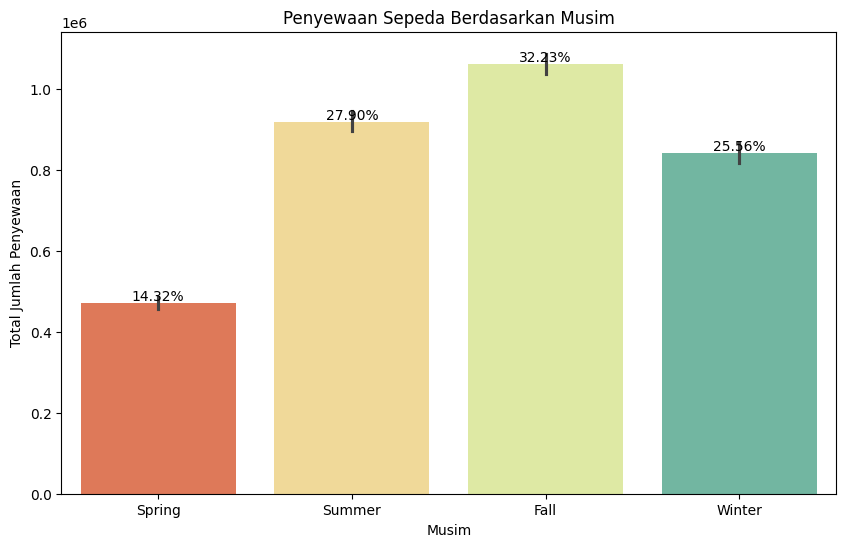

In [29]:
fig = plt.figure(figsize=(10, 6))
p = sns.barplot(x='season_x', y='cnt_x', data=all_df, palette='Spectral', estimator=sum)
plt.title('Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
total = all_df['cnt_x'].sum()
for patch in p.patches:
    percentage = patch.get_height() / total * 100
    p.annotate(f'{percentage:.2f}%',
               (patch.get_x() + patch.get_width() / 2., patch.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Berdasarkan grafik diatas dapat dilihat bahwa penyewaan sepeda paling banyak terdapat pada musim gugur sebanyak 32.23% diikuti dengan penggunaan dimusim panas sebanyak 27.9%, kemudian musim dingin sebanyak 25.56% dan yang terakhir musim semi sebanyak 14.32%

###Pertanyaan 2: Bagaimana hubungan antara cuaca (weathersit) dan jumlah penyewaan sepeda?

<ipython-input-26-91a11b94f9b1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.barplot(x='weathersit', y='cnt', data=hour_df, palette='coolwarm', estimator=sum)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: W

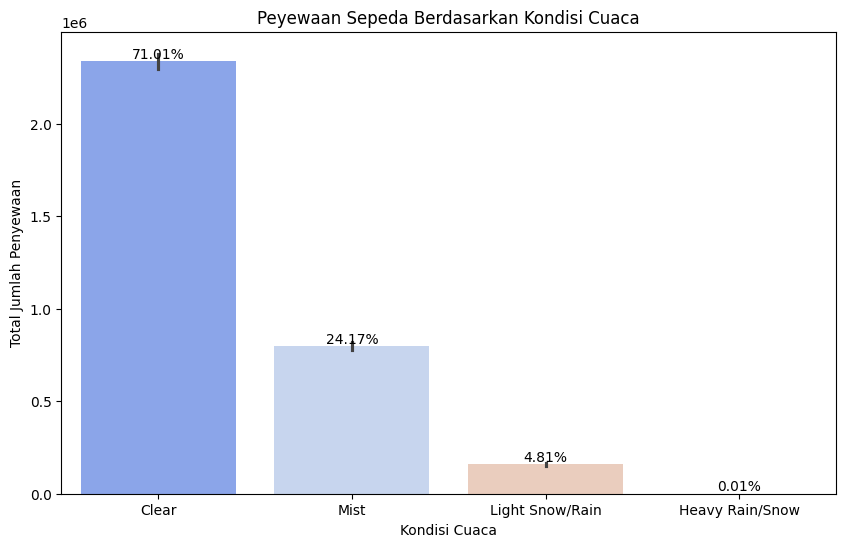

In [26]:
fig = plt.figure(figsize=(10, 6))
p = sns.barplot(x='weathersit_x', y='cnt_x', data=all_df, palette='coolwarm', estimator=sum)
plt.title('Peyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
total = all_df['cnt_x'].sum()
for patch in p.patches:
    percentage = patch.get_height() / total * 100
    p.annotate(f'{percentage:.2f}%',
               (patch.get_x() + patch.get_width() / 2., patch.get_height()),
               ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

Berdasarkan grafik di atas, dapat terlihat bahwa penyewaan sepeda paling banyak ada pada kondisi cuaca clear (1) disusul dengan mist (2), light snown/rain (3), dan terakhir heavy rain/snow (4). Pada kondisi Clear pengguna sepeda sebanyak 71.01%, pada konsdisi mist sebanyak 24.17%, sedangkan pada kondisi light snow/rain sebanyak 4.81% dan paling sedikit pada kondisi heavy rain/snow sebanyak 0.01%

### Pertanyaan 3: Bagaimana hubungan antara musim dan cuaca terhadap penyewaan sepeda?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 1200x600 with 0 Axes>

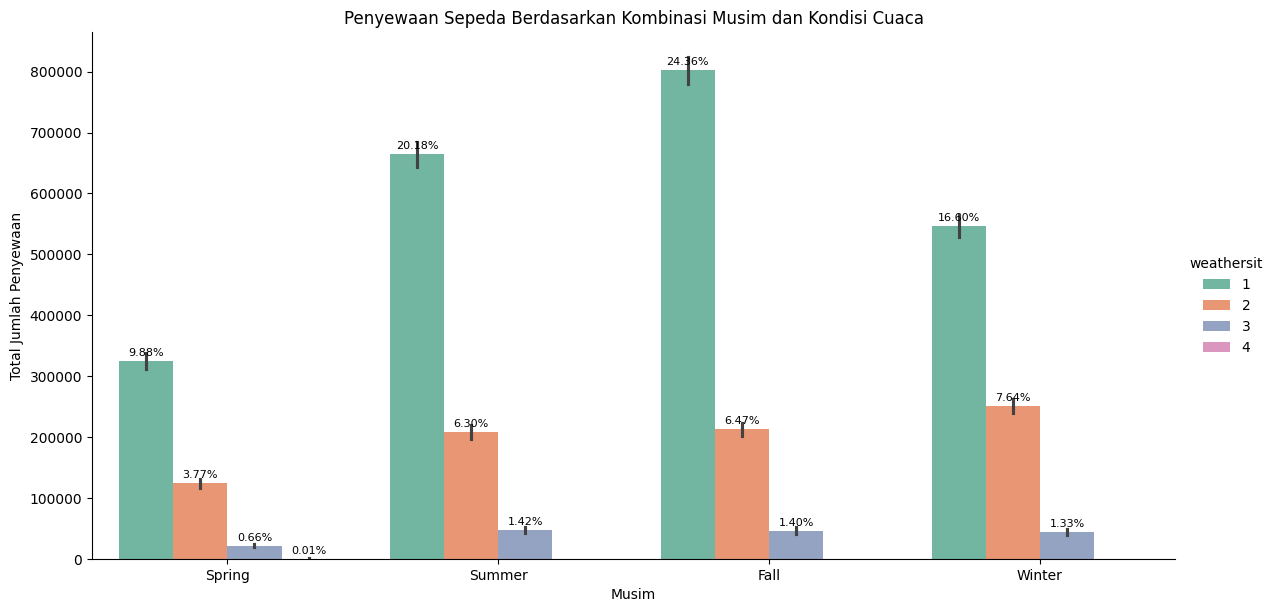

In [27]:
cat_plot = sns.catplot(x='season_x', y='cnt_x', hue='weathersit_x', data=all_df, kind='bar', palette='Set2', estimator=sum, height=6, aspect=2)
fig = sns.catplot(x='season_x', y='cnt_x', hue='weathersit_x', data=all_df, kind='bar',
                       palette='Set2', estimator=sum, height=6, aspect=2)
plt.title('Penyewaan Sepeda Berdasarkan Kombinasi Musim dan Kondisi Cuaca')
plt.xlabel('Musim')
plt.ylabel('Total Jumlah Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
ax = cat_plot.ax
total = all_df['cnt_x'].sum()
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            percentage = height / total
            ax.annotate(f'{percentage:.2%}',
                        (bar.get_x() + bar.get_width() / 2., height),
                        ha='center', va='center',
                        xytext=(0, 6), textcoords='offset points', fontsize=8)
plt.show()


Penyewaan sepeda paling banyak terdapat pada musim gugur (fall) diikuti musim panas (summer), musim dingin (winter), dan musim semi (fall). Pada musim gugur pengguna sepeda saat kondisi cuaca clear mencapai 24.36% diikuti dengan kondisi cuaca mist, rain, dan heavy rain. Pada musim lainnya juga sama yaitu penyewaan sepeda paling banyak pada kondisi cuaca clear, disusul dengan mist, rain/snow, dan heavy rain/snow

### Pertanyaan 4: Bagaimana penyewaan sepeda dari tahun ke tahun?

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


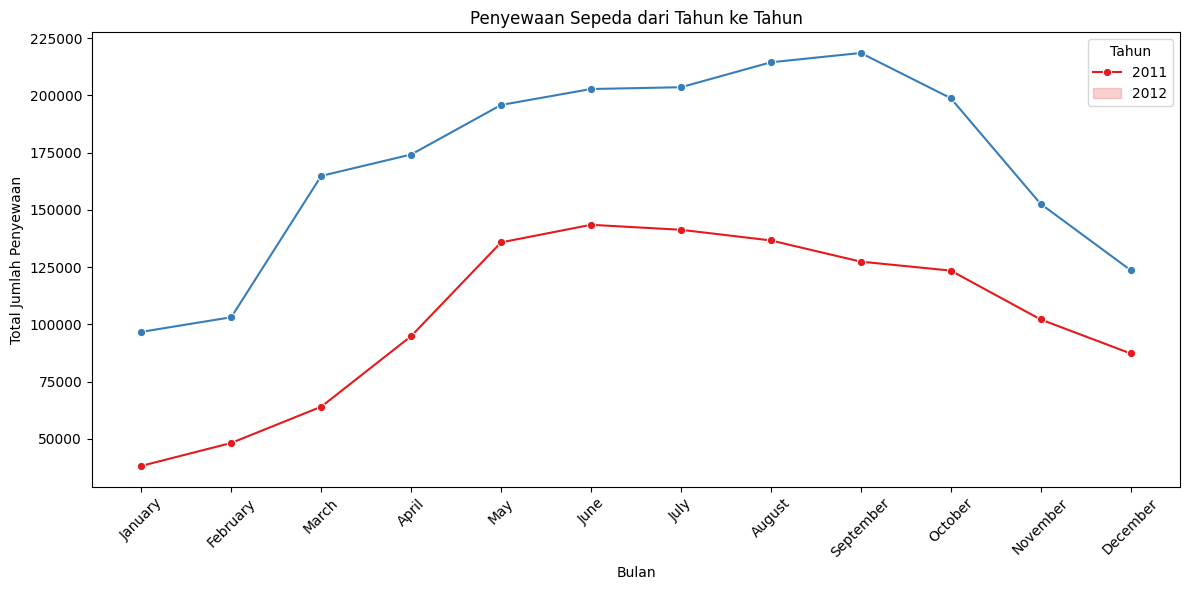

In [28]:
monthly_usage = all_df.groupby(['yr_x', 'mnth_x'])['cnt_x'].sum().reset_index()
monthly_usage['mnth_x'] = monthly_usage['mnth_x'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
fig = plt.figure(figsize=(12, 6))
sns.lineplot(x='mnth_x', y='cnt_x', hue='yr_x', data=monthly_usage, marker='o', palette='Set1')
plt.title('Penyewaan Sepeda dari Tahun ke Tahun')
plt.xlabel('Bulan')
plt.ylabel('Total Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.tight_layout()
plt.show()

Penyewaan sepeda pada tahun 2012 meningkat dari tahun 2011 dengan behavior pengguna yang hampir sama yaitu dari bulan januari sampai mei meningkat dan akan mengalami penurunan dari bulan oktober sampai november. Hal ini dikarenakan dari bulan oktober sampai desember mulai memasuki musim dingin yang mengakibatkan sedikitnya jumlah penyewaan sepeda.

**Insight:**
- Penyewaan sepeda paling banyak terdapat pada musim gugur
- penyewaan sepeda paling banyak ada pada kondisi cuaca clear (1) disusul dengan mist (2), light snown/rain (3), dan terakhir heavy rain/snow (4).
- Pada musim gugur penyewaan sepeda saat kondisi cuaca clear mencapai 24.36% diikuti dengan kondisi cuaca mist, rain, dan heavy rain.
- Penyewaan sepeda tahun 2012 meningkat dari tahun 2011 dengan behavior pengguna yang hampir sama yaitu dari bulan januari sampai mei meningkat dan akan mengalami penurunan dari bulan oktober sampai november.

## Conclusion

- Berdasarkan grafik diatas dapat dilihat bahwa penyewaan sepeda paling banyak terdapat pada musim gugur sebanyak 32.23% diikuti dengan penggunaan dimusim panas sebanyak 27.9%, kemudian musim dingin sebanyak 25.56% dan yang terakhir musim semi sebanyak 14.32%
- Berdasarkan grafik di atas, dapat terlihat bahwa penyewaan sepeda paling banyak ada pada kondisi cuaca clear (1) disusul dengan mist (2), light snown/rain (3), dan terakhir heavy rain/snow (4). Pada kondisi Clear pengguna sepeda sebanyak 71.01%, pada konsdisi mist sebanyak 24.17%, sedangkan pada kondisi light snow/rain sebanyak 4.81% dan paling sedikit pada kondisi heavy rain/snow sebanyak 0.01%
- Penyewaan sepeda paling banyak terdapat pada musim gugur (fall) diikuti musim panas (summer), musim dingin (winter), dan musim semi (fall). Pada musim gugur pengguna sepeda saat kondisi cuaca clear mencapai 24.36% diikuti dengan kondisi cuaca mist, rain, dan heavy rain. Pada musim lainnya juga sama yaitu penyewaan sepeda paling banyak pada kondisi cuaca clear, disusul dengan mist, rain/snow, dan heavy rain/snow
- Penyewaan sepeda pada tahun 2012 meningkat dari tahun 2011 dengan behavior pengguna yang hampir sama yaitu dari bulan januari sampai mei meningkat dan akan mengalami penurunan dari bulan oktober sampai november. Hal ini dikarenakan dari bulan oktober sampai desember mulai memasuki musim dingin yang mengakibatkan sedikitnya jumlah penyewaan sepeda.

In [30]:
all_data_df.to_csv("all_data.csv", index=False)